In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import calmap

CA_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/CAvideos.csv')
DE_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/DEvideos.csv')
FR_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/FRvideos.csv')
GB_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/GBvideos.csv')
IN_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/INvideos.csv')
US_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/USvideos.csv')

files = [i for i in glob.glob('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/*.{}'.format('csv'))]
files.remove('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/JPvideos.csv')
files.remove('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/KRvideos.csv')
files.remove('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/MXvideos.csv')
files.remove('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/RUvideos.csv')
sorted(files)

others = ['Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/JPvideos.csv', 
          'Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/KRvideos.csv',
          'Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/MXvideos.csv',
          'Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/RUvideos.csv']

dfs = list()
for csv in files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[53:55]
    dfs.append(df)

for csv in others:
    df = pd.read_csv(csv, index_col='video_id', encoding="ISO-8859-1")
    df['country'] = csv[53:55]
    dfs.append(df)

my_df = pd.concat(dfs)

my_df['trending_date'] = pd.to_datetime(my_df['trending_date'],errors='coerce', format='%y.%d.%m')
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publish_time'].notnull()]

my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time

my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df[['publish_date','publish_time']].head()

array(['People & Blogs', 'Comedy', 'News & Politics', 'Entertainment',
       'Sports', 'Autos & Vehicles', 'Gaming', 'Film & Animation',
       'Howto & Style', 'Science & Technology', 'Shows', 'Music',
       'Travel & Events', 'Education', 'Pets & Animals',
       'Nonprofits & Activism'], dtype=object)

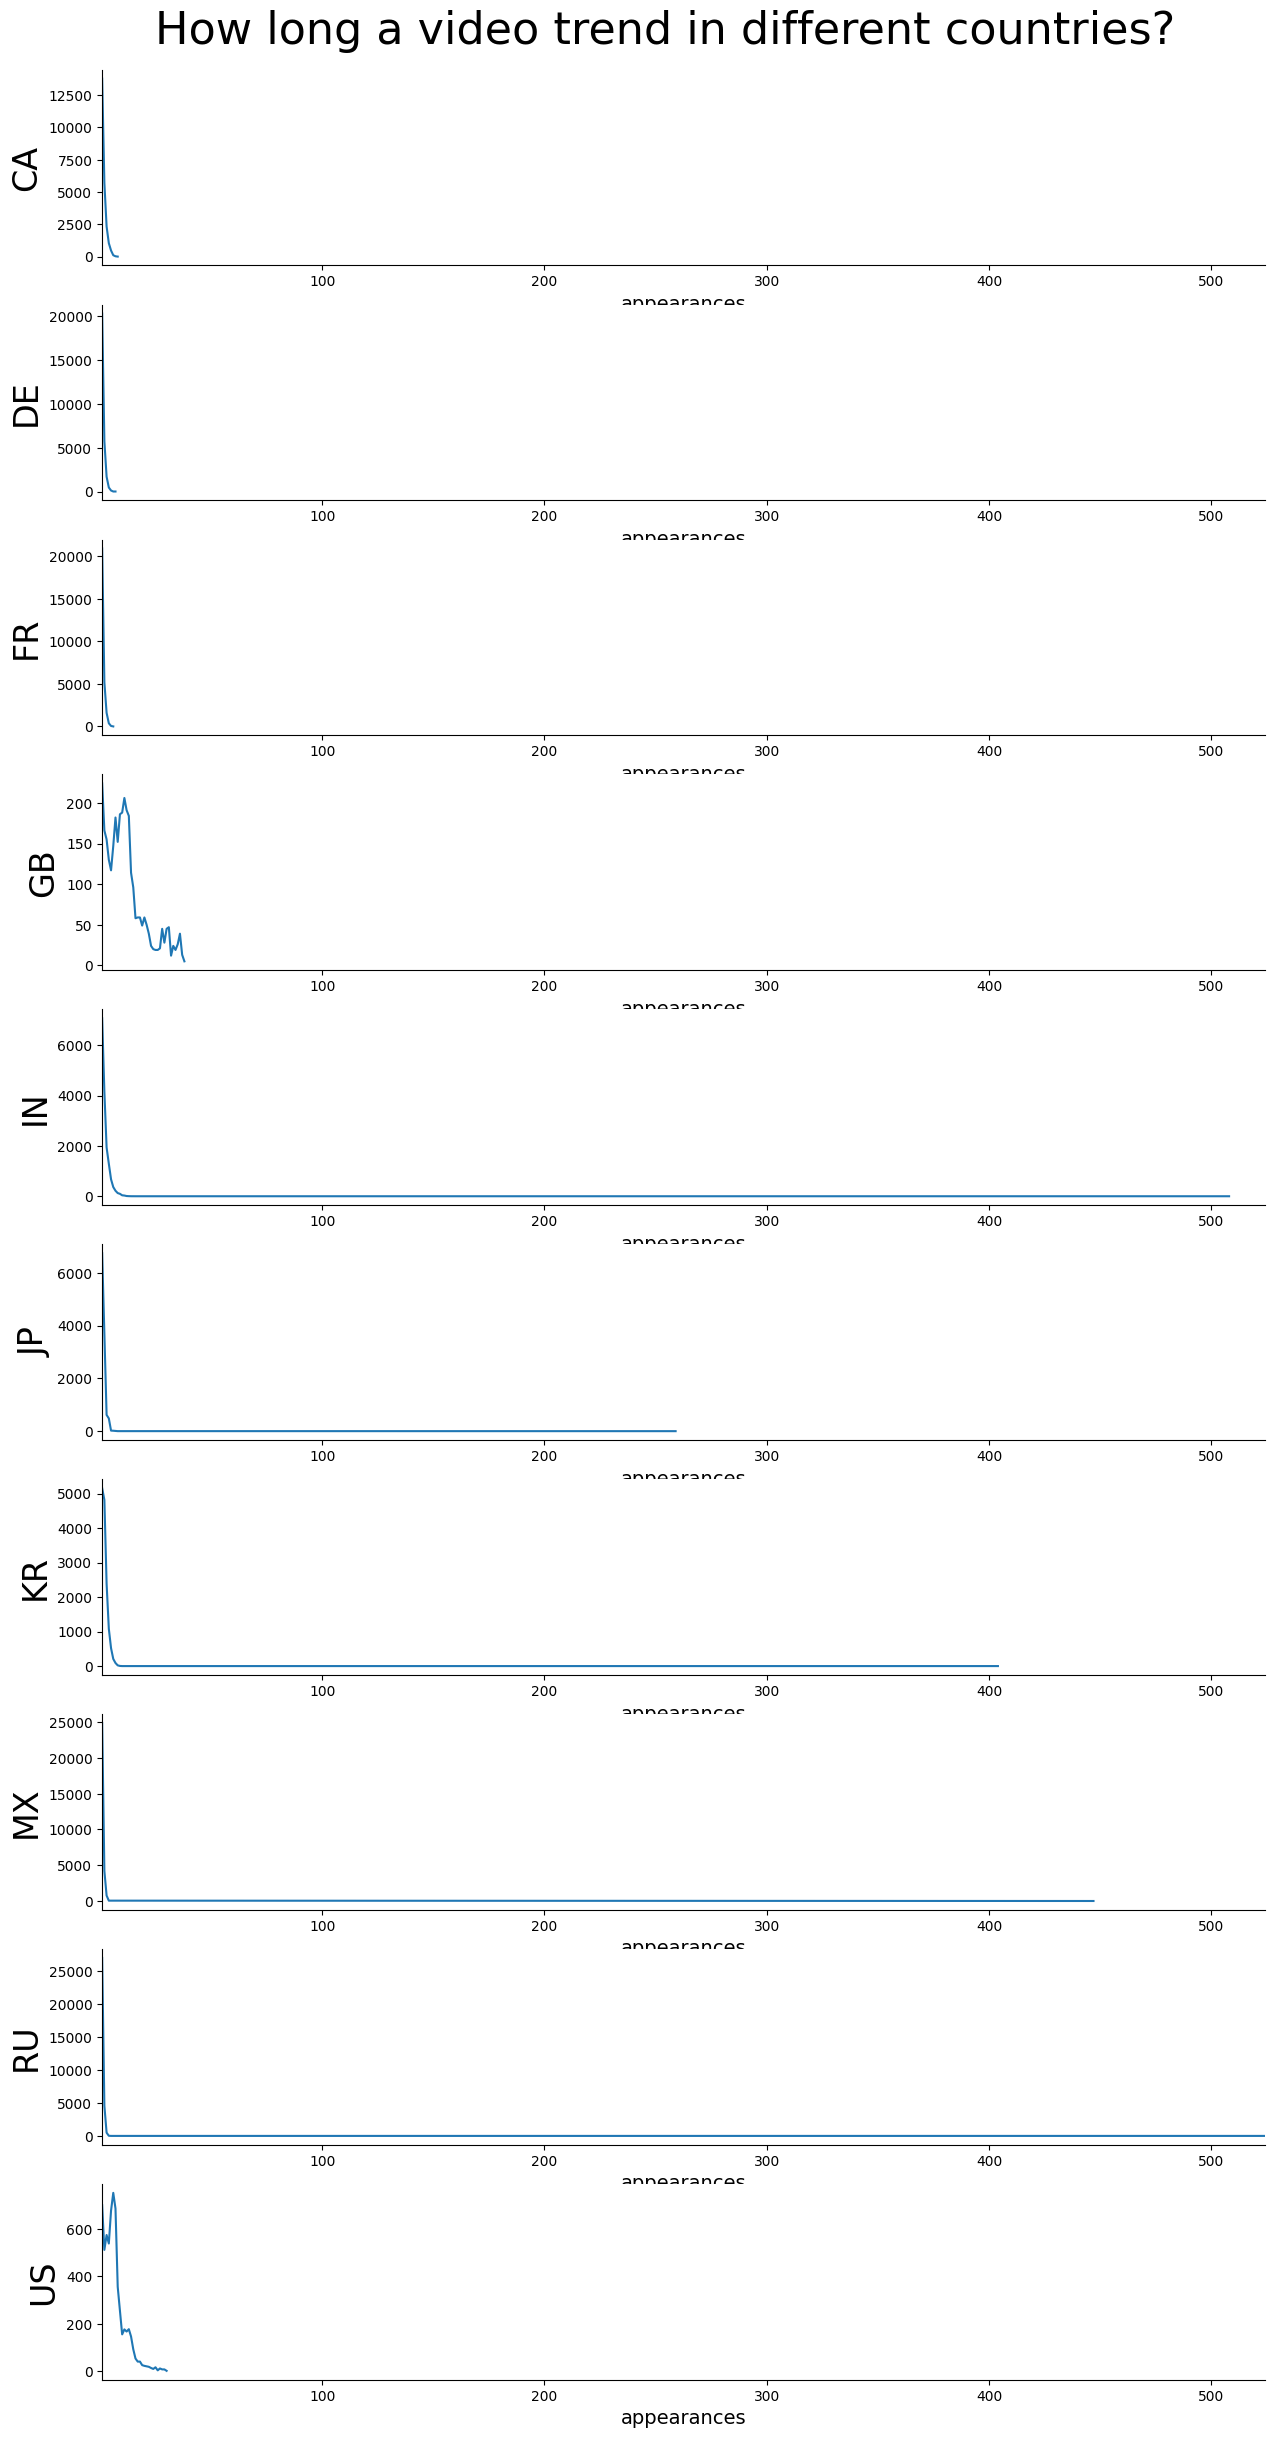

In [50]:
fre_df = pd.DataFrame(my_df_full.groupby([my_df_full.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df.head(), fre_df.tail()

video_list,max_list = list(),list()
country_list = my_df.groupby(['country']).count().index

for c in country_list:
    video_list.append(fre_df[fre_df['country']==c]['title'].value_counts().sort_index())
    max_list.append(max(fre_df[fre_df['country']==c]['title'].value_counts().sort_index().index))
    
fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9] = plt.subplots(nrows=10,figsize=(15, 30))
st = fig.suptitle("How long a video trend in different countries?", fontsize=32)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(country_list[i],fontsize=24)
    pt.axes.set_xlim(1, max(max_list))

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)